In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
column_names = ['hpso', 'simulation_type', 'time', 'graph', 'telescope', 'nodes', 'channels', 'data', 'pipeline_sets']

df = pd.read_csv('results_2023-09-17.csv',header=None,names=column_names)
df = df.drop_duplicates()

# Need to transform data of each row into the form: 
# Telescope| experiment approach | time | with  data

hpso_obs = set(df['hpso'])

# Isolate single HPSO01 and only pick 896 channels (although 512 doesn't appear to make a difference)
grouped_hpsos = df.groupby(["simulation_type",'data'])

xaxis = {
    "False":"Parametric",
    "no_data":"Workflow,\n Prototype",
    "edges":"Workflow,\n Prototype - Edge Data",
    "task_edges":"Workflow,\n Prototype - Edge + Task Data"}

In [130]:
# Store parametric in combined data frame
df_parametric = df_overview.append(grouped_hpsos.get_group(('parametric', 'False')), ignore_index=True).sort_values(by='hpso')
df_parametric['Workflow Type'] = "Parametric"
df_overview = pd.DataFrame()

for data in ['no_data', 'edges', 'task_edges']:
    
    df_tmp = pd.DataFrame()
    df_tmp = df_tmp.append(grouped_hpsos.get_group(('workflow', data)), ignore_index=True).sort_values(by='hpso')
    df_tmp['ratio'] = (np.array(df_tmp['time']) / np.array(df_parametric['time']))
    df_tmp['Workflow Type'] = xaxis[data]
    #     df_overview = df_overview.append(
#     df_tmp['ratio'] = (np.array(df_tmp['time']) / float((df_tmp[df_tmp['simulation_type'] == 'parametric']['time']))
#     df_tmp['Workflow Type'] = pd.Series(xaxis)
    df_overview = df_overview.append(df_tmp, ignore_index=True)

# df_overview.dropna()# = pd.DataFrame(df_list)
# df_overview['hpso'] = df_overview['hpso'].str.upper()
df_overview

,hpso,simulation_type,time,graph,telescope,nodes,channels,data,pipeline_sets,ratio,Workflow Type
0,hpso01,workflow,14753,prototype,low-adjusted,896,896,no_data,ICAL,1.146666,"Workflow,\n Prototype"
1,hpso02a,workflow,8077,prototype,low-adjusted,896,896,no_data,ICAL,1.075786,"Workflow,\n Prototype"
2,hpso02b,workflow,8077,prototype,low-adjusted,896,896,no_data,ICAL,1.075786,"Workflow,\n Prototype"
3,hpso13,workflow,3336,prototype,low-adjusted,786,786,no_data,ICAL,1.713405,"Workflow,\n Prototype"
4,hpso15,workflow,201,prototype,low-adjusted,786,786,no_data,ICAL,1.732759,"Workflow,\n Prototype"
5,hpso22,workflow,54262,prototype,low-adjusted,786,786,no_data,ICAL,1.635136,"Workflow,\n Prototype"
6,hpso32,workflow,522,prototype,low-adjusted,786,786,no_data,ICAL,1.636364,"Workflow,\n Prototype"
7,hpso01,workflow,84908,prototype,low-adjusted,896,896,edges,ICAL,6.599409,"Workflow,\n Prototype - Edge Data"
8,hpso02a,workflow,28393,prototype,low-adjusted,896,896,edges,ICAL,3.781700,"Workflow,\n Prototype - Edge Data"
9,hpso02b,workflow,28393,prototype,low-adjusted,896,896,edges,ICAL,3.781700,"Workflow,\n Prototype - Edge Data"


{'hpso01', 'hpso02a', 'hpso02b', 'hpso13', 'hpso15', 'hpso22', 'hpso32'}

In [124]:
# grouped_hpsos = df.groupby(["hpso", "channels"])
df_hpso02 = grouped_hpsos.get_group(("hpso13",896))

df_hpso_grouped_min2 = df_hpso02.groupby(["simulation_type", "graph", "data"], as_index=False).mean()

# df_hpso = grouped_hpsos.get_group(("hpso01",896, "scatter", False))
# xaxis = ["Parametric", "Workflow, Prototype", "Workflow, Prototype - Data", "Workflow, Scatter"]
df_hpso_grouped_min2['xaxis'] = pd.Series(xaxis)

df_hpso_grouped_min2['ratio'] =  np.array(df_hpso_grouped_min2['time']) / float(df_hpso_grouped_min2[df_hpso_grouped_min2['simulation_type'] == 'parametric']['time'])

In [125]:
df_hpso_grouped_min2

,simulation_type,graph,data,time,nodes,channels,xaxis,ratio
0,parametric,prototype,False,5655.0,896.0,896.0,Parametric,1.000000
1,workflow,prototype,False,5911.5,896.0,896.0,"Workflow,\n Prototype",1.045358
2,workflow,prototype,True,17118.5,896.0,896.0,"Workflow,\n Prototype - Data",3.027144
3,workflow,scatter,False,6045.0,896.0,896.0,"Workflow,\n Scatter",1.068966


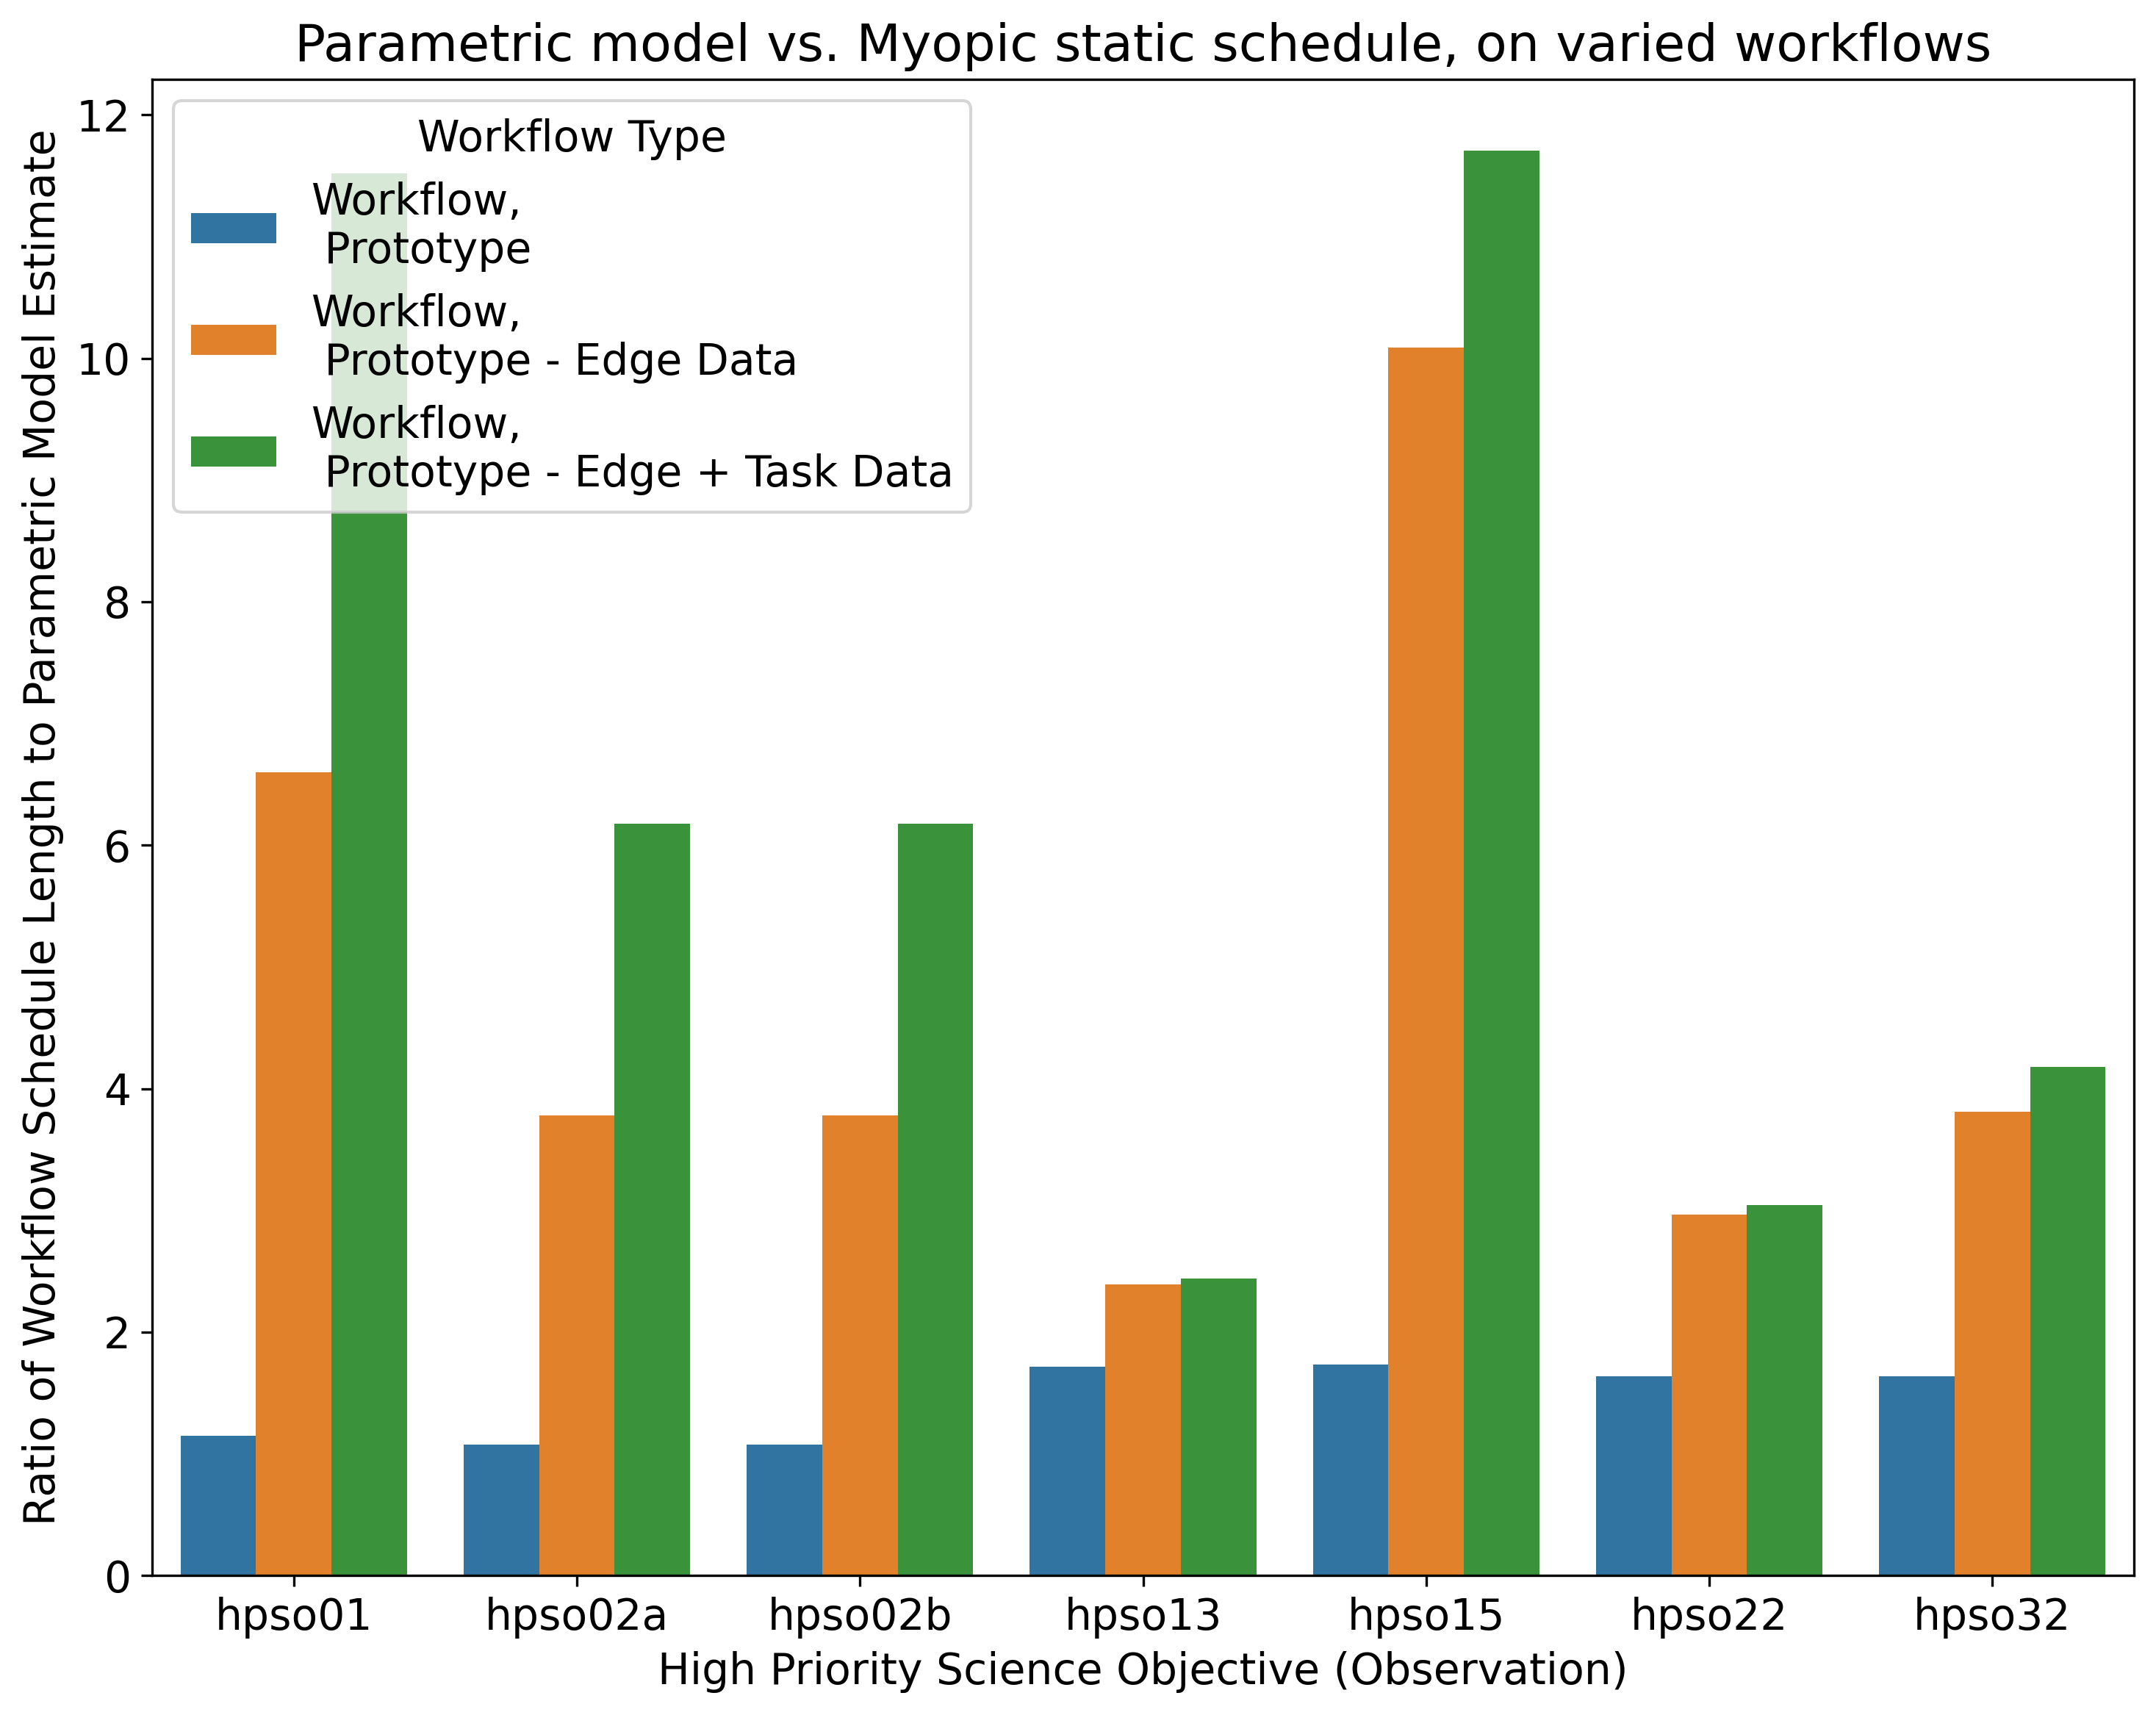

In [135]:
# f, ax = plt.subplots(figsize=(12,8))
plt.rcParams.update({'font.size': 14})
# f, ax = plt.subplots(figsize=(14,10),dpi=300)

# might want to restructure data so that we have simulation_type as parametric, scatter, prototype
f, ax = plt.subplots(ncols=1,nrows=1 ,figsize=(10,8), sharey=True, dpi=300, tight_layout=True)

# might want to restructure data so that we have simulation_type as parametric, scatter, prototype

# g = sns.barplot(
#     df_overview, y='ratio', x='xaxis', order=[xaxis[0],xaxis[3],xaxis[1],xaxis[2]],ax=ax)
# g.set_yscale('log')

g = sns.barplot(data=df_overview, y='ratio', x='hpso', hue='Workflow Type', hue_order=[xaxis['no_data'],xaxis['edges'],xaxis['task_edges']]) # hue='xaxis')#, kind="box")

ax.set_title("Parametric model vs. Myopic static schedule, on varied workflows")
ax.set_xlabel("High Priority Science Objective (Observation)")
ax.set_ylabel("Ratio of Workflow Schedule Length to Parametric Model Estimate")

ax.tick_params(labelleft=True)
plt.savefig("SchedulingComparisons_2023-09-17.png", facecolor="white", transparent=False, bbox_inches="tight")